In [11]:
# Manipulación y análisis de datos
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Expresiones regulares
import re
from fuzzywuzzy import process

import warnings
warnings.filterwarnings('ignore')

In [12]:
def check_df(df, tipo):
  # tipo == 'simple' - Solo muestra volumenes y cabecera
  if tipo == 'simple':
    print("¿Cuántas filas y columnas hay en el conjunto de datos?")
    num_filas, num_columnas = df.shape
    print("\tHay {:,} filas y {:,} columnas.".format(num_filas, num_columnas))
    print('\n########################################################################################')

    print("¿Cuáles son las primeras dos filas del conjunto de datos?")
    display(df.head(2))
    print('\n########################################################################################')

  else:
    print("¿Cuántas filas y columnas hay en el conjunto de datos?")
    num_filas, num_columnas = df.shape
    print("\tHay {:,} filas y {:,} columnas.".format(num_filas, num_columnas))
    print('\n########################################################################################')

    print("¿Cuáles son las primeras dos filas del conjunto de datos?")
    display(df.head(2))
    print('\n########################################################################################')

    print("¿Cuáles son las últimas dos filas del conjunto de datos?")
    display(df.tail(2))
    print('\n########################################################################################')

    print("¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?")
    display(df.sample(2))
    print('\n########################################################################################')

    print("¿Cuáles son las columnas del conjunto de datos?")
    for i in list(df.columns):
      print('\t - ' + i)
    print('\n########################################################################################')

    print("¿Cuál es el tipo de datos de cada columna?")
    print(df.dtypes)
    print('\n########################################################################################')

    print("¿Cuántas columnas hay de cada tipo de datos?")
    print(df.dtypes.value_counts())
    print('\n########################################################################################')

    print("¿Cómo podríamos obtener información más completa sobre la estructura y el contenido del DataFrame?")
    print(df.info())
    print('\n########################################################################################')

    print("¿Cuántos valores únicos tiene cada columna?")
    print(df.nunique())
    print('\n########################################################################################')

    print("¿Cuáles son las estadísticas descriptivas básicas de las columnas numéricas?")
    display(df.describe(include = 'all').fillna(''))
    print('\n########################################################################################')

    print("¿Hay valores nulos en el conjunto de datos?")
    print(df.isnull().sum().sort_values(ascending = False))
    print('\n########################################################################################')

    print("¿Cuál es el porcentaje de valores nulos en cada columna?")
    print(round((df.isnull().sum()/len(df)*100), 2).sort_values(ascending = False))
    print('\n########################################################################################')

In [13]:
path = r'W:\My Documents\Sandris\Nuclio\TFM'
file = '\compas-scores-raw.csv'
df = pd.read_csv(path + file)

In [14]:
check_df (df,'')

¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 60,843 filas y 28 columnas.

########################################################################################
¿Cuáles son las primeras dos filas del conjunto de datos?


,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,...,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,7,Risk of Violence,-2.08,4,Low,New,1,0
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0



########################################################################################
¿Cuáles son las últimas dos filas del conjunto de datos?


,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,...,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
60841,68603,79669,72042,PRETRIAL,Ryan,Michael,NaN,Male,Caucasian,02/06/85,...,1,Low,8,Risk of Recidivism,-0.34,5,Medium,New,1,0
60842,68603,79669,72042,PRETRIAL,Ryan,Michael,NaN,Male,Caucasian,02/06/85,...,1,Low,18,Risk of Failure to Appear,16.00,2,Low,New,1,0



########################################################################################
¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?


,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,...,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
31836,60082,68909,62471,PRETRIAL,MCFADDEN,RODNEY,NaN,Male,Caucasian,05/11/57,...,1,Low,7,Risk of Violence,-4.14,1,Low,New,1,0
19849,56531,64497,58525,PRETRIAL,REMBERT,WESLEY,CARDELL,Male,African-American,03/16/87,...,2,Medium,8,Risk of Recidivism,-0.19,6,Medium,New,1,0



########################################################################################
¿Cuáles son las columnas del conjunto de datos?
	 - Person_ID
	 - AssessmentID
	 - Case_ID
	 - Agency_Text
	 - LastName
	 - FirstName
	 - MiddleName
	 - Sex_Code_Text
	 - Ethnic_Code_Text
	 - DateOfBirth
	 - ScaleSet_ID
	 - ScaleSet
	 - AssessmentReason
	 - Language
	 - LegalStatus
	 - CustodyStatus
	 - MaritalStatus
	 - Screening_Date
	 - RecSupervisionLevel
	 - RecSupervisionLevelText
	 - Scale_ID
	 - DisplayText
	 - RawScore
	 - DecileScore
	 - ScoreText
	 - AssessmentType
	 - IsCompleted
	 - IsDeleted

########################################################################################
¿Cuál es el tipo de datos de cada columna?
Person_ID                    int64
AssessmentID                 int64
Case_ID                      int64
Agency_Text                 object
LastName                    object
FirstName                   object
MiddleName                  object
Sex_Code_Text        

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,...,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
count,60843.0,60843.0,60843.0,60843,60843,60843,15624,60843,60843,60843,...,60843.0,60843,60843.0,60843,60843.0,60843.0,60798,60843,60843.0,60843.0
unique,,,,4,10896,7225,1870,2,9,10382,...,,4,,3,,,3,2,,
top,,,,PRETRIAL,Williams,Michael,A,Male,African-American,04/28/92,...,,Low,,Risk of Violence,,,Low,New,,
freq,,,,41100,417,777,606,47514,27018,30,...,,38472,,20281,,,41487,56139,,
mean,53683.206154,68061.02919,60209.128149,,,,,,,,...,1.630048,,11.0,,5.081457,3.571701,,,1.0,0.0
std,14363.648515,7320.208226,9638.501654,,,,,,,,...,0.94422,,4.966596,,10.080518,2.617854,,,0.0,0.0
min,656.0,649.0,350.0,,,,,,,,...,1.0,,7.0,,-4.79,-1.0,,,1.0,0.0
25%,52039.0,62582.0,56021.0,,,,,,,,...,1.0,,7.0,,-2.09,1.0,,,1.0,0.0
50%,57321.0,68229.0,61261.0,,,,,,,,...,1.0,,8.0,,-0.71,3.0,,,1.0,0.0
75%,62748.0,73870.0,66554.0,,,,,,,,...,2.0,,18.0,,14.0,5.0,,,1.0,0.0



########################################################################################
¿Hay valores nulos en el conjunto de datos?
MiddleName                 45219
ScoreText                     45
Person_ID                      0
CustodyStatus                  0
IsCompleted                    0
AssessmentType                 0
DecileScore                    0
RawScore                       0
DisplayText                    0
Scale_ID                       0
RecSupervisionLevelText        0
RecSupervisionLevel            0
Screening_Date                 0
MaritalStatus                  0
LegalStatus                    0
AssessmentID                   0
Language                       0
AssessmentReason               0
ScaleSet                       0
ScaleSet_ID                    0
DateOfBirth                    0
Ethnic_Code_Text               0
Sex_Code_Text                  0
FirstName                      0
LastName                       0
Agency_Text                    0
Case_ID 

In [15]:
# Convertir columnas de fecha a formato datetime
df['DateOfBirth'] = pd.to_datetime(df['DateOfBirth'], errors='coerce')
df['Screening_Date'] = pd.to_datetime(df['Screening_Date'], errors='coerce')

# Verificar los valores fuera de lo normal en las fechas de nacimiento y de evaluación
date_anomalies = df[(df['DateOfBirth'] > df['Screening_Date']) | df['DateOfBirth'].isna() | df['Screening_Date'].isna()]
print(date_anomalies[['DateOfBirth', 'Screening_Date']].describe())

# Corregir el cálculo de la edad excluyendo fechas inválidas
df_valid_dates = df[df['DateOfBirth'] <= df['Screening_Date']]
df_valid_dates['Age'] = (df_valid_dates['Screening_Date'] - df_valid_dates['DateOfBirth']).dt.days // 365

# Verificar la distribución de la edad después de la corrección
print(df_valid_dates['Age'].describe())

                         DateOfBirth                 Screening_Date
count                          17601                          17601
mean   2063-07-23 21:14:04.929265664  2013-12-13 14:23:34.965058560
min              2018-11-04 00:00:00            2013-01-01 00:00:00
25%              2059-03-31 00:00:00            2013-06-05 00:00:00
50%              2064-08-06 00:00:00            2013-12-09 00:00:00
75%              2069-06-14 00:00:00            2014-06-05 00:00:00
max              2073-12-31 00:00:00            2014-12-31 00:00:00
count    43242.000000
mean        27.028098
std          5.914610
min         16.000000
25%         22.000000
50%         26.000000
75%         32.000000
max         40.000000
Name: Age, dtype: float64


In [16]:
# Normalización de categorías en Ethnic_Code_Text
df_valid_dates['Ethnic_Code_Text'] = df_valid_dates['Ethnic_Code_Text'].replace({
    'African-Am': 'African-American',
    'Oriental': 'Asian'
})

In [17]:
# Reemplazar valores nulos de 'MiddleName' por una cadena vacía
df_valid_dates['MiddleName'].fillna('', inplace=True)

In [18]:
# Eliminar columnas que no son relevantes para el análisis del sesgo
# columns_to_drop = ['Person_ID', 'AssessmentID', 'Case_ID', 'LastName', 'FirstName', 'MiddleName', 'ScaleSet_ID', 
                   #'ScaleSet', 'AssessmentReason', 'Language', 'LegalStatus', 'CustodyStatus', 'MaritalStatus', 
                   #'Screening_Date', 'DisplayText', 'AssessmentType', 'IsCompleted', 'IsDeleted']
df_cleaned = df_valid_dates


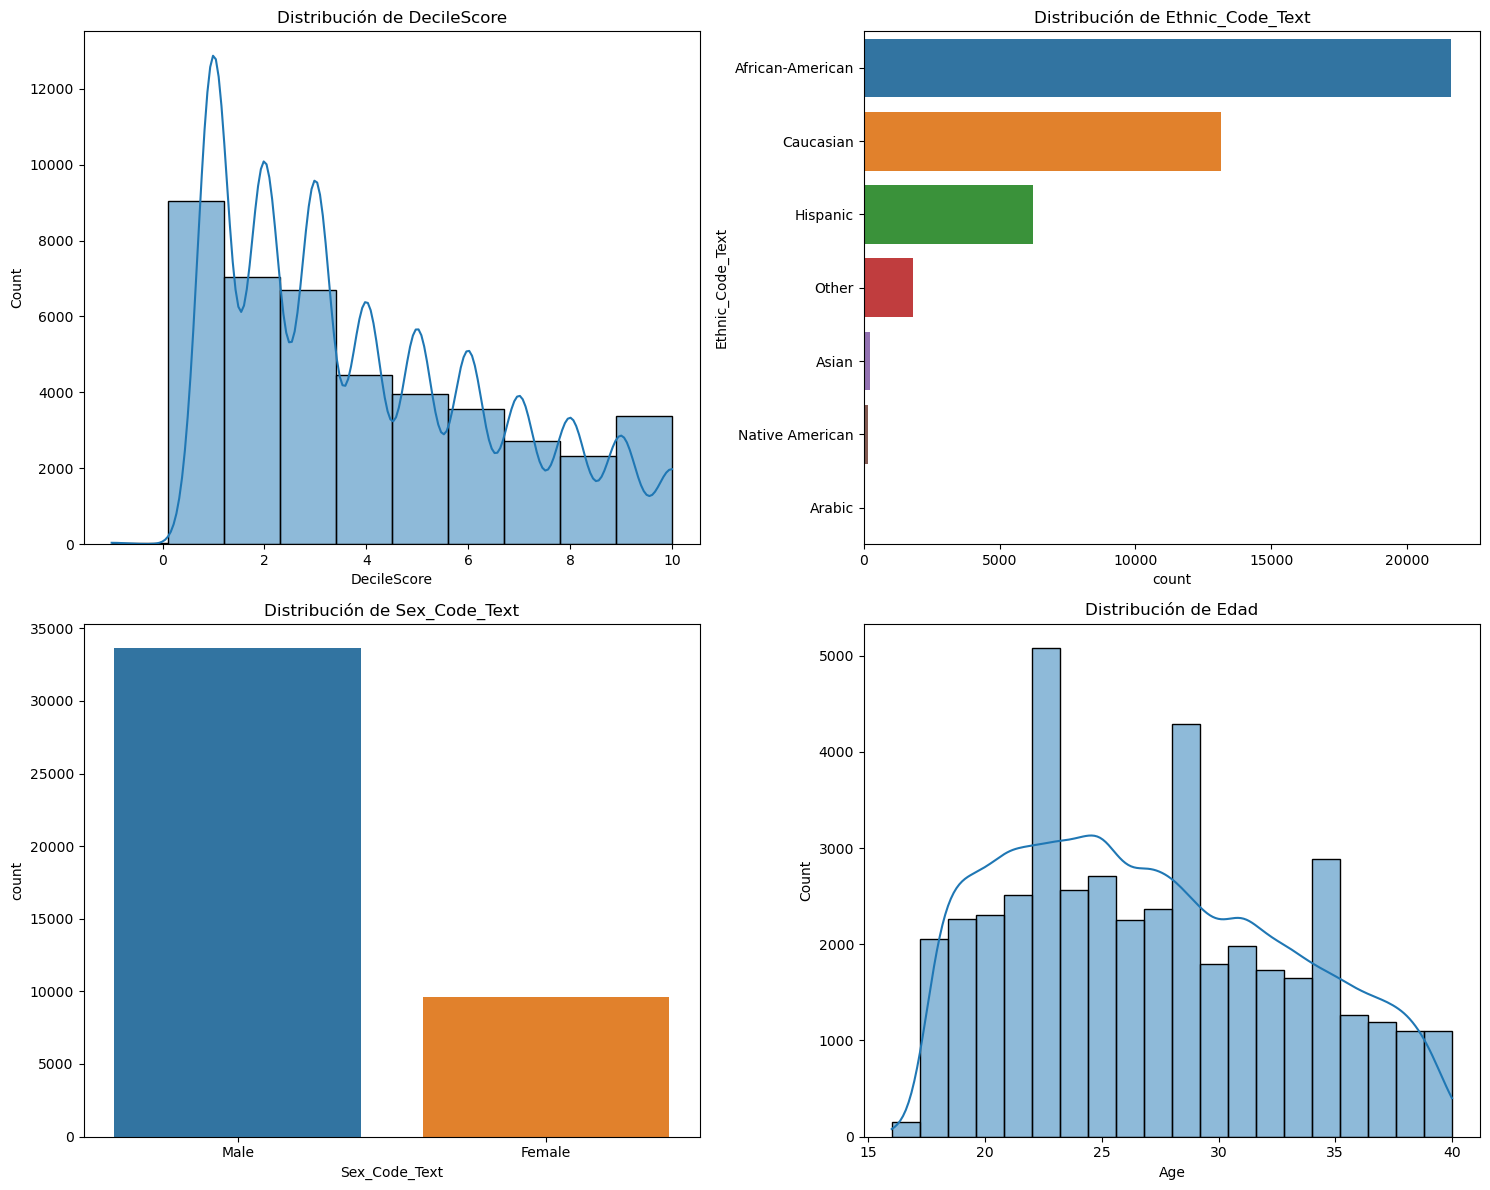

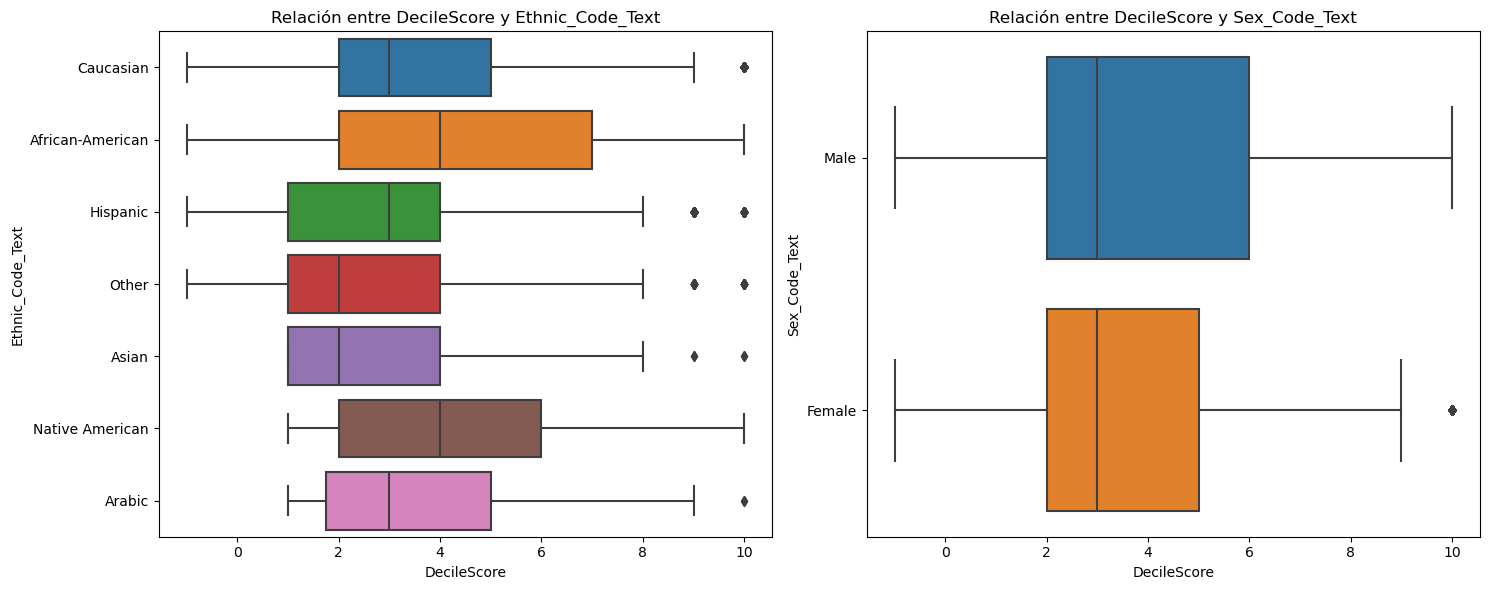

In [19]:
# Análisis Univariado
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Distribución de DecileScore
sns.histplot(df_cleaned['DecileScore'], bins=10, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribución de DecileScore')

# Distribución de Ethnic_Code_Text
sns.countplot(y=df_cleaned['Ethnic_Code_Text'], order=df_cleaned['Ethnic_Code_Text'].value_counts().index, ax=axes[0, 1])
axes[0, 1].set_title('Distribución de Ethnic_Code_Text')

# Distribución de Sex_Code_Text
sns.countplot(x=df_cleaned['Sex_Code_Text'], ax=axes[1, 0])
axes[1, 0].set_title('Distribución de Sex_Code_Text')

# Distribución de Age
sns.histplot(df_cleaned['Age'], bins=20, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribución de Edad')

plt.tight_layout()
plt.show()

# Análisis Bivariado
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Relación entre DecileScore y Ethnic_Code_Text
sns.boxplot(x='DecileScore', y='Ethnic_Code_Text', data=df_cleaned, ax=axes[0])
axes[0].set_title('Relación entre DecileScore y Ethnic_Code_Text')

# Relación entre DecileScore y Sex_Code_Text
sns.boxplot(x='DecileScore', y='Sex_Code_Text', data=df_cleaned, ax=axes[1])
axes[1].set_title('Relación entre DecileScore y Sex_Code_Text')

plt.tight_layout()
plt.show()


In [20]:
# Agrupar por 'Person_ID' y tomar el primer valor de 'Sex_Code_Text' y 'Ethnic_Code_Text'
grouped_by_marital = df_cleaned.groupby('Person_ID').agg({
    'MaritalStatus': 'first'
})
# Contar la distribución por etnia
marital_distribution = grouped_by_marital['MaritalStatus'].value_counts()
print(marital_distribution)
print(marital_distribution.sum())

MaritalStatus
Single               10923
Married               1222
Divorced               349
Significant Other      308
Separated              262
Unknown                 45
Widowed                 16
Name: count, dtype: int64
13125


<Axes: xlabel='count', ylabel='MaritalStatus'>

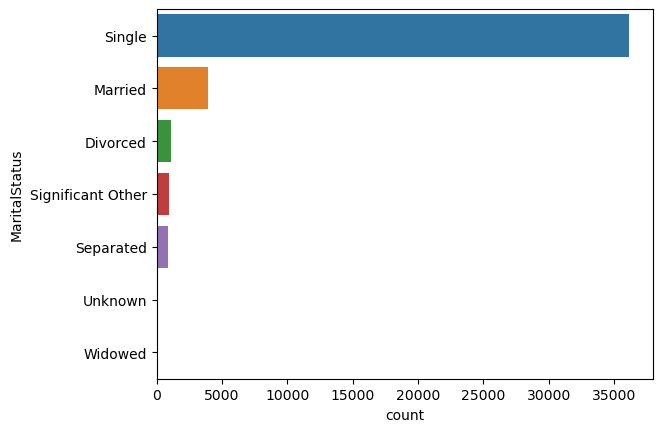

In [21]:
# Distribución de Marital_Status
sns.countplot(y=df_cleaned['MaritalStatus'], order=df_cleaned['MaritalStatus'].value_counts().index)
